In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from datetime import datetime
import sys
import argparse
from pathlib import Path

import matplotlib.pyplot as plt
plt.style.use(['science','no-latex', "bright"])
print("Using 'science' matplotlib style")

Using 'science' matplotlib style


In [3]:
Results_Path = Path("")
Figs_Path = Results_Path / "Plots"
Figs_Path.mkdir(exist_ok=True, parents=True)

In [4]:
df = pd.read_excel("AttendenceRates.xlsx")
Xs = df["Ages"]

df.pop("Man Informal Work")
df.pop("Women Informal Work")


MaleCols = [col for col in df.columns if "Man" in col ]
FemaleCols = [col for col in df.columns if "Women" in col ]
cols = [cols[4:] for cols in MaleCols]
Men = df[MaleCols]
Men.columns = cols
Women = df[FemaleCols]
Women.columns = cols

0 Distribution centres
1 Communal
2 E-voucher
3 Female communal
4 Non-food distribution 
5 Play group
6 Pump and latrine
7 Religious
8 Shelter visits


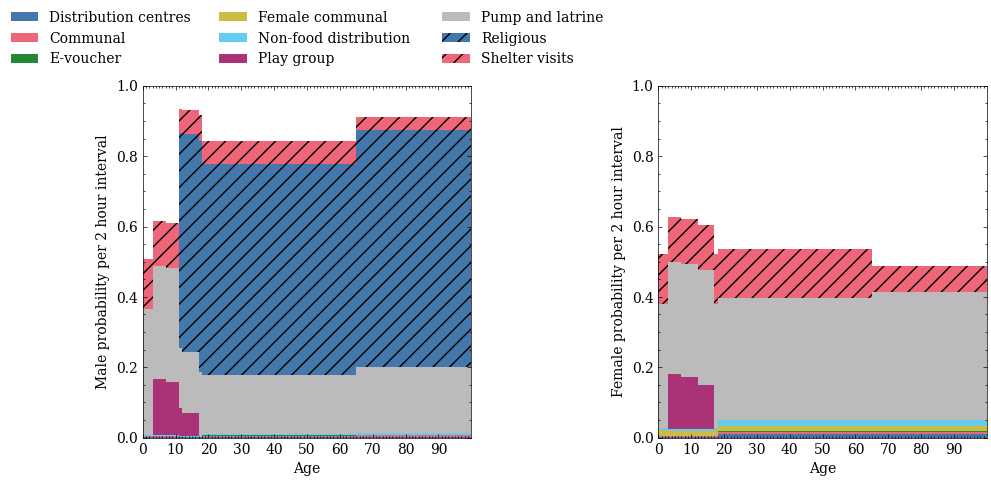

In [5]:
plt.rcParams["figure.figsize"] = (10,5)
f, (ax1,ax2) = plt.subplots(1,2)
f.patch.set_facecolor('white')

bins = np.arange(0,101,1)
lower_M = np.zeros(len(bins)-1)
lower_W = np.zeros(len(bins)-1)
mids = 0.5*(bins[:-1]+bins[1:])
widths = (bins[1:]-bins[:-1])
plotted = 0

#ax1.plot(Xs+0.5, Men.iloc[:,0], color="black", linestyle="--")
#ax2.plot(Xs+0.5, Women.iloc[:,0], color="black", linestyle="--")
for ii, contact_type in enumerate(cols[1:]):
    
        
    print(ii, contact_type)

    if plotted > len(plt.rcParams['axes.prop_cycle'].by_key()["color"])-1:
        hatch='//'
    else:
        hatch=None
                
    heights_M = Men[contact_type]
    ax1.bar(
        mids, heights_M, widths, bottom=lower_M,
        hatch=hatch, label=contact_type,
        edgecolor="black",linewidth=0
    )
    lower_M = lower_M + heights_M
    
    heights_W = Women[contact_type]
    ax2.bar(
        mids, heights_W, widths, bottom=lower_W,
        hatch=hatch, label=contact_type,
        edgecolor="black",linewidth=0
    )
    lower_W = lower_W + heights_W
    
    plotted += 1

ax1.set_xlim(bins[0], bins[-1])
ax1.set_ylim(0,1)
ax2.set_xlim(bins[0], bins[-1])
ax2.set_ylim(0,1)

ticksminor = np.arange(0, bins[-1], int((bins[-1] + 1) / (bins[-1] - 1)))
ax1.set_xticks(ticksminor, minor=True)
ax2.set_xticks(ticksminor, minor=True)

ticksmajor = np.arange(0, bins[-1], 10)
ax1.set_xticks(ticksmajor)
ax2.set_xticks(ticksmajor)

ax1.legend(bbox_to_anchor = (0.5,1.02),loc='lower center',ncol=3)
ax1.set_xlabel('Age')
ax1.set_ylabel('Male probability per 2 hour interval')
ax2.set_xlabel('Age')
ax2.set_ylabel('Female probability per 2 hour interval')
f.subplots_adjust(top=0.70)
plt.tight_layout()
plt.savefig(Figs_Path / "AgeProbabilities.pdf", dpi=300)
plt.savefig(Figs_Path / "AgeProbabilities.png", dpi=300)

0 Distribution centres
1 Communal
2 E-voucher
3 Female communal
4 Non-food distribution 
5 Play group
6 Pump and latrine
7 Religious
8 Shelter visits


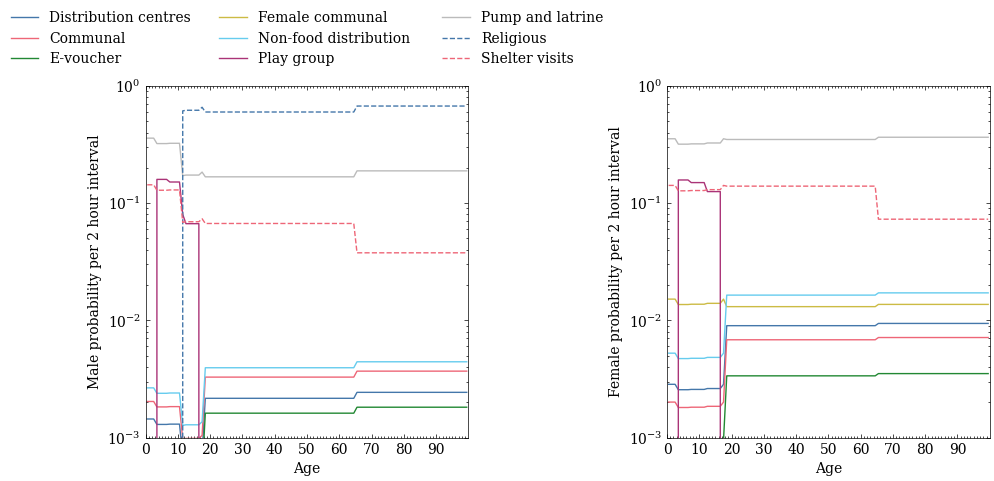

In [6]:
plt.rcParams["figure.figsize"] = (10,5)
f, (ax1,ax2) = plt.subplots(1,2)
f.patch.set_facecolor('white')

bins = np.arange(0,101,1)
lower_M = np.zeros(len(bins)-1)
lower_W = np.zeros(len(bins)-1)
mids = 0.5*(bins[:-1]+bins[1:])
widths = (bins[1:]-bins[:-1])
plotted = 0

#ax1.plot(Xs+0.5, Men.iloc[:,0], color="black", linestyle="--")
#ax2.plot(Xs+0.5, Women.iloc[:,0], color="black", linestyle="--")
for ii, contact_type in enumerate(cols[1:]):
    print(ii, contact_type)

    if plotted > len(plt.rcParams['axes.prop_cycle'].by_key()["color"])-1:
        linestyle='--'
    else:
        linestyle="-"
                
    heights_M = Men[contact_type]
    ax1.plot(
        mids, heights_M, linestyle=linestyle,
        label=contact_type
    )
    lower_M = lower_M + heights_M
    
    heights_W = Women[contact_type]
    ax2.plot(
        mids, heights_W, linestyle=linestyle,
        label=contact_type
    )
    lower_W = lower_W + heights_W
    
    plotted += 1

ax1.set_xlim(bins[0], bins[-1])
ax1.set_ylim(1e-3,1)
ax2.set_xlim(bins[0], bins[-1])
ax2.set_ylim(1e-3,1)

ticksminor = np.arange(0, bins[-1], int((bins[-1] + 1) / (bins[-1] - 1)))
ax1.set_xticks(ticksminor, minor=True)
ax2.set_xticks(ticksminor, minor=True)

ticksmajor = np.arange(0, bins[-1], 10)
ax1.set_xticks(ticksmajor)
ax2.set_xticks(ticksmajor)

ax1.set_yscale("log")
ax2.set_yscale("log")

ax1.legend(bbox_to_anchor = (0.5,1.02),loc='lower center',ncol=3)
ax1.set_xlabel('Age')
ax1.set_ylabel('Male probability per 2 hour interval')
ax2.set_xlabel('Age')
ax2.set_ylabel('Female probability per 2 hour interval')
f.subplots_adjust(top=0.70)
plt.tight_layout()
plt.savefig(Figs_Path / "AgeProbabilities_Log.pdf", dpi=300)
plt.savefig(Figs_Path / "AgeProbabilities_Log.png", dpi=300)